In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_burnout_dataset.csv to cleaned_burnout_dataset.csv


In [4]:
data = pd.read_csv("cleaned_burnout_dataset.csv")
print(data.head())

   EmployeeID  Age      Gender    Country            JobRole Department  \
0        1001   50        Male         UK    Sales Associate         HR   
1        1002   36        Male    Germany  Software Engineer         IT   
2        1003   29  Non-binary      India           IT Admin         IT   
3        1004   42        Male  Australia      HR Specialist         IT   
4        1005   40        Male     Brazil   Customer Support    Support   

   YearsAtCompany  WorkHoursPerWeek RemoteWork  BurnoutLevel  ...  \
0              14                47         No          3.37  ...   
1               1                59     Hybrid          7.39  ...   
2              13                59     Hybrid          7.10  ...   
3              15                31        Yes          4.18  ...   
4               6                34        Yes          8.28  ...   

   CommuteTime  HasMentalHealthSupport  ManagerSupportScore  HasTherapyAccess  \
0          117                      No               

In [6]:
X = data.drop("BurnoutRisk", axis=1)
y = data["BurnoutRisk"]
print("Features and target separated.")
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features and target separated.
Features shape: (3000, 24)
Target shape: (3000,)


In [8]:
#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 2400
Testing samples: 600


In [15]:
#One-hot encode categorical columns
X_encoded = pd.get_dummies(X)
#Train-test split on encoded data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
#Scale the encoded data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [16]:
#Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
#Train Linear Discriminant Analysis (LDA)
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [17]:
#Make predictions
log_preds = log_model.predict(X_test)
lda_preds = lda_model.predict(X_test)
#Predict probabilities for ROC-AUC
log_probs = log_model.predict_proba(X_test)[:, 1]
lda_probs = lda_model.predict_proba(X_test)[:, 1]

In [20]:
#Evaluate
for name, preds, probs in [("Logistic Regression", log_preds, log_probs),
                           ("LDA", lda_preds, lda_probs)]:
    acc = accuracy_score(y_test, preds)
    auc = roc_auc_score(y_test, probs)
    cm = confusion_matrix(y_test, preds)

    print(f"{name}")
    print("Accuracy:",round(acc,2))
    print("ROC-AUC:",round(auc,2))
    print("Confusion Matrix:")
    print(cm)

Logistic Regression
Accuracy: 0.99
ROC-AUC: 1.0
Confusion Matrix:
[[395   4]
 [  2 199]]
LDA
Accuracy: 0.95
ROC-AUC: 1.0
Confusion Matrix:
[[367  32]
 [  0 201]]


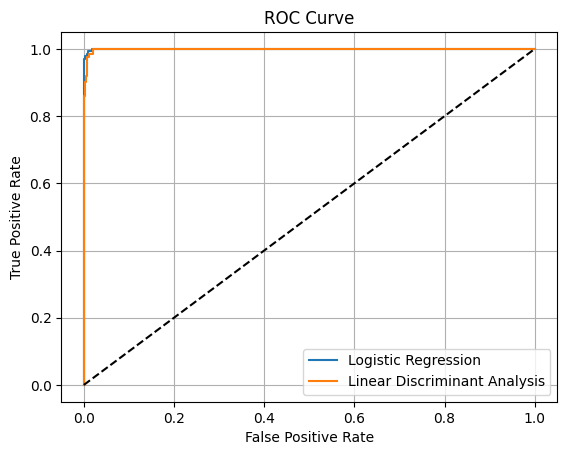

In [23]:
#Plotting ROC Curve
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
fpr_lda, tpr_lda, _ = roc_curve(y_test, lda_probs)

plt.plot(fpr_log, tpr_log, label="Logistic Regression")
plt.plot(fpr_lda, tpr_lda, label="Linear Discriminant Analysis")
plt.plot([0, 1], [0, 1], 'k--')  #baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()
